In [2]:
## Common Packages
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
import sklearn.model_selection as skm
from ISLP import load_data, confusion_table
from ISLP.models import (ModelSpec as MS,
                         summarize)
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


## Packages for this assignment
from sklearn.tree import (DecisionTreeClassifier as DTC,
                          DecisionTreeRegressor as DTR,
                          plot_tree,
                          export_text)
from sklearn.metrics import (accuracy_score,
                             log_loss)
from sklearn.ensemble import \
     (RandomForestRegressor as RF,
      GradientBoostingRegressor as GBR)
from ISLP.bart import BART
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import f1_score as f1




# Applied Question

In [2]:
Boston = load_data("Boston")
model = MS(Boston.columns.drop('medv'), intercept=False)
D = model.fit_transform(Boston)
feature_names = list(D.columns)
X = np.asarray(D)

In [3]:
(X_train,
 X_test,
 y_train,
 y_test) = skm.train_test_split(X,
                                Boston['medv'],
                                test_size=0.3,
                                random_state=0)

In [10]:
bag_boston = RF(max_features=X_train.shape[1],  n_estimators=1, random_state=0)
bag_boston.fit(X_train, y_train)

RandomForestRegressor(max_features=12, n_estimators=1, random_state=0)

25.484802631578948

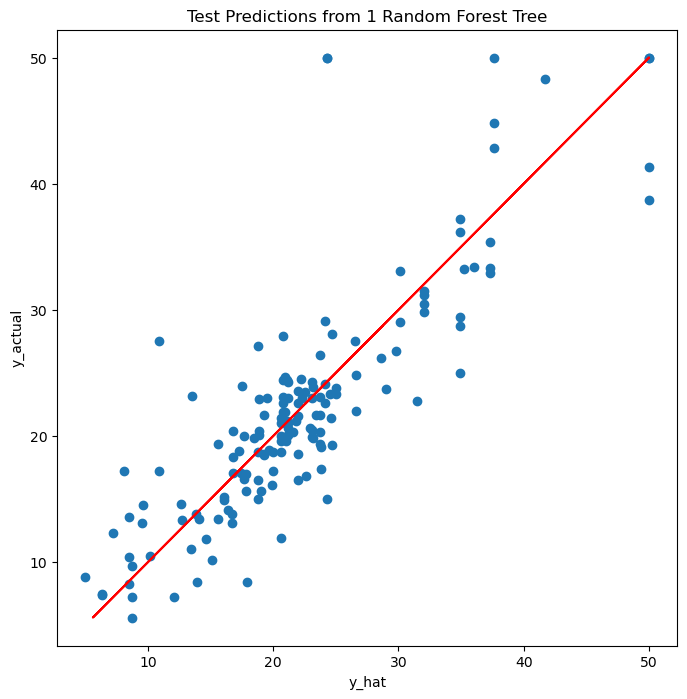

In [16]:
ax = subplots(figsize=(8,8))[1]
y_hat_bag = bag_boston.predict(X_test)
ax.scatter(y_hat_bag, y_test)
ax.plot(y_test,y_test, color = 'red')
ax.set_xlabel('y_hat')
ax.set_ylabel('y_actual')
ax.set_title('Test Predictions from 1 Random Forest Tree')
np.mean((y_test - y_hat_bag)**2)

In [17]:
bag_boston = RF(max_features=X_train.shape[1],
                n_estimators=10,
                random_state=0).fit(X_train, y_train)
y_hat_bag = bag_boston.predict(X_test)
np.mean((y_test - y_hat_bag)**2)

18.909683552631584

18.909683552631584

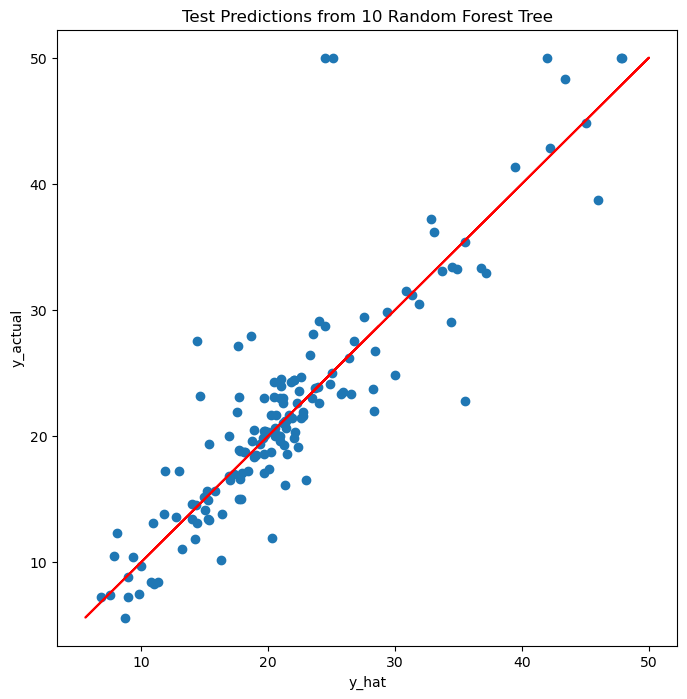

In [19]:
ax = subplots(figsize=(8,8))[1]
y_hat_bag = bag_boston.predict(X_test)
ax.scatter(y_hat_bag, y_test)
ax.plot(y_test,y_test, color = 'red')
ax.set_xlabel('y_hat')
ax.set_ylabel('y_actual')
ax.set_title('Test Predictions from 10 Random Forest Tree')
np.mean((y_test - y_hat_bag)**2)

In [20]:
bag_boston = RF(max_features=X_train.shape[1],
                n_estimators=100,
                random_state=0).fit(X_train, y_train)
y_hat_bag = bag_boston.predict(X_test)
np.mean((y_test - y_hat_bag)**2)

14.634700151315787

14.634700151315787

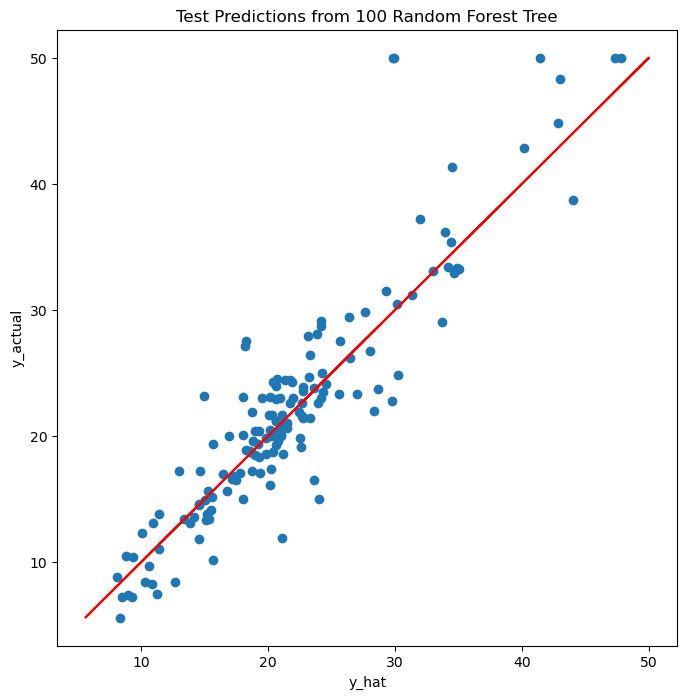

In [21]:
ax = subplots(figsize=(8,8))[1]
y_hat_bag = bag_boston.predict(X_test)
ax.scatter(y_hat_bag, y_test)
ax.plot(y_test,y_test, color = 'red')
ax.set_xlabel('y_hat')
ax.set_ylabel('y_actual')
ax.set_title('Test Predictions from 100 Random Forest Tree')
np.mean((y_test - y_hat_bag)**2)

https://towardsdatascience.com/interpreting-random-forests-638bca8b49ea/  
https://stackoverflow.com/questions/59678961/how-to-plot-the-error-and-the-tree-size-of-a-random-forest

[23.250387586052636, 20.40428914789475, 19.64186492421054, 19.406360161842134, 18.12268831578947, 18.762017916052635, 17.164722846578947, 16.62331775184211, 16.325287383421063, 15.647295147631583, 14.991992723947371]


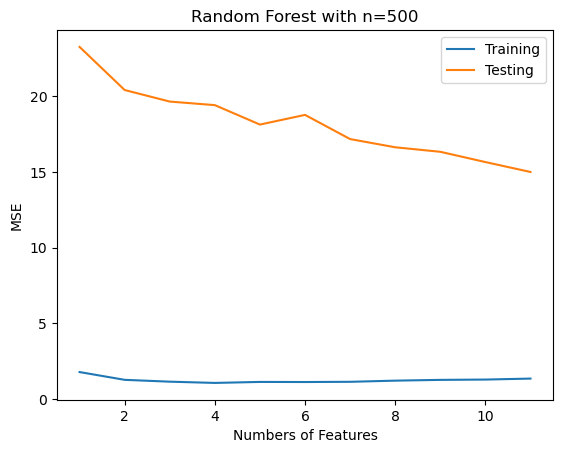

In [7]:
test_error = []
train_error = []
Features = list(range(1, X_train.shape[1]))
for num_featrures in Features:
   bag_boston = RF(max_features=num_featrures, n_estimators=500, random_state=0).fit(X_train, y_train)
   train_error.append(np.mean((y_train - bag_boston.predict(X_train))**2))
   test_error.append(np.mean((y_test - bag_boston.predict(X_test))**2))
print(np.min(test_error))


plt.plot(Features, train_error, label='Training')
plt.plot(Features, test_error, label='Testing')

plt.xlabel('Numbers of Features')
plt.ylabel('MSE')
plt.title('Random Forest with n=500')

plt.legend()
plt.show()

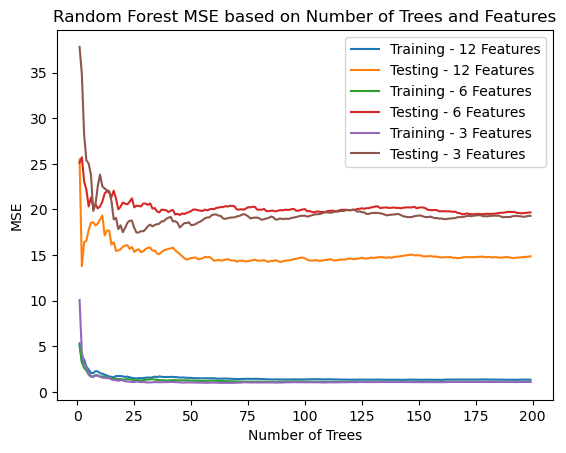

In [8]:
train_error_m12 = []
test_error_m12 = []
train_error_m6 = []
test_error_m6 = []
train_error_m3 = []
test_error_m3 = []
Trees = list(range(1, 200))
for num_Trees in Trees:
    bag_boston = RF(max_features=12, n_estimators=num_Trees, random_state=0).fit(X_train, y_train)
    train_error_m12.append(np.mean((y_train - bag_boston.predict(X_train))**2))
    test_error_m12.append(np.mean((y_test - bag_boston.predict(X_test))**2))
    
    bag_boston = RF(max_features=6, n_estimators=num_Trees, random_state=0).fit(X_train, y_train)
    train_error_m6.append(np.mean((y_train - bag_boston.predict(X_train))**2))
    test_error_m6.append(np.mean((y_test - bag_boston.predict(X_test))**2))

    bag_boston = RF(max_features=3, n_estimators=num_Trees, random_state=0).fit(X_train, y_train)
    train_error_m3.append(np.mean((y_train - bag_boston.predict(X_train))**2))
    test_error_m3.append(np.mean((y_test - bag_boston.predict(X_test))**2))


plt.plot(Trees, train_error_m12, label='Training - 12 Features')
plt.plot(Trees, test_error_m12, label='Testing - 12 Features')
plt.plot(Trees, train_error_m6, label='Training - 6 Features')
plt.plot(Trees, test_error_m6, label='Testing - 6 Features')
plt.plot(Trees, train_error_m3, label='Training - 3 Features')
plt.plot(Trees, test_error_m3, label='Testing - 3 Features')

plt.xlabel('Number of Trees')
plt.ylabel('MSE')
plt.title('Random Forest MSE based on Number of Trees and Features')

plt.legend()
plt.show()

In [22]:
print(np.min(test_error_m12))
print(np.min(test_error_m6))
print(np.min(test_error_m3))


13.784901315789469
19.393901007147498
17.46656522500778


# Multi-Class Prediction of Obesity Risk

## Import Data

In [4]:
obese = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

Predictors = list(obese.columns)
Predictors.remove('NObeyesdad')
Predictors

['id',
 'Gender',
 'Age',
 'Height',
 'Weight',
 'family_history_with_overweight',
 'FAVC',
 'FCVC',
 'NCP',
 'CAEC',
 'SMOKE',
 'CH2O',
 'SCC',
 'FAF',
 'TUE',
 'CALC',
 'MTRANS']

In [5]:
obese


,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II
20756,20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II


In [6]:
obese = pd.get_dummies(obese, columns=['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS'], drop_first = False)
test = pd.get_dummies(test, columns=['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS'], drop_first = False)


In [7]:
Predictors = list(obese.columns)
Predictors
Quants = list(['Age',  'Height',  'Weight',  'FCVC',  'NCP',  'CH2O',  'FAF',  'TUE',])

In [8]:
Predictors.remove('NObeyesdad')
Predictors

['id',
 'Age',
 'Height',
 'Weight',
 'FCVC',
 'NCP',
 'CH2O',
 'FAF',
 'TUE',
 'Gender_Female',
 'Gender_Male',
 'family_history_with_overweight_no',
 'family_history_with_overweight_yes',
 'FAVC_no',
 'FAVC_yes',
 'CAEC_Always',
 'CAEC_Frequently',
 'CAEC_Sometimes',
 'CAEC_no',
 'SMOKE_no',
 'SMOKE_yes',
 'SCC_no',
 'SCC_yes',
 'CALC_Frequently',
 'CALC_Sometimes',
 'CALC_no',
 'MTRANS_Automobile',
 'MTRANS_Bike',
 'MTRANS_Motorbike',
 'MTRANS_Public_Transportation',
 'MTRANS_Walking']

## Correlation Matrix

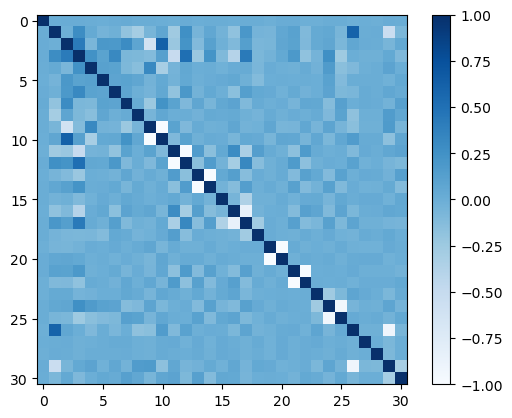

In [9]:
matrix = obese[Predictors].corr()

# plotting correlation matrix
plt.imshow(matrix, cmap='Blues')

# adding colorbar
plt.colorbar()

## Normality

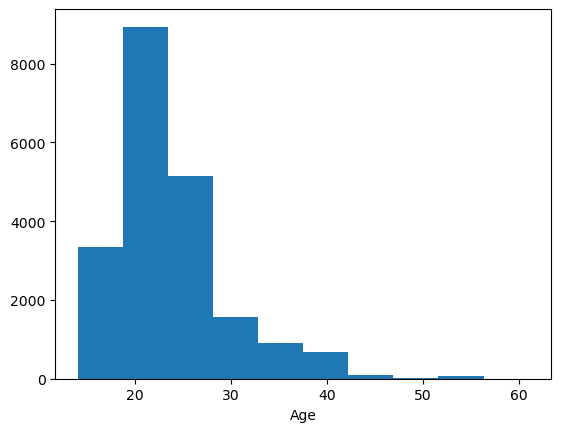

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=14.0, statistic_sign=-1)


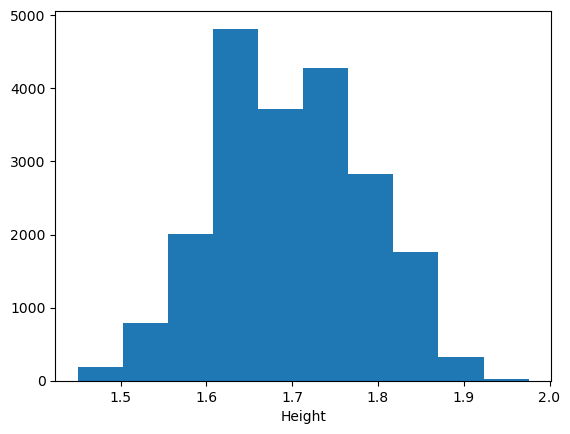

KstestResult(statistic=0.9319884437836518, pvalue=0.0, statistic_location=1.5, statistic_sign=-1)


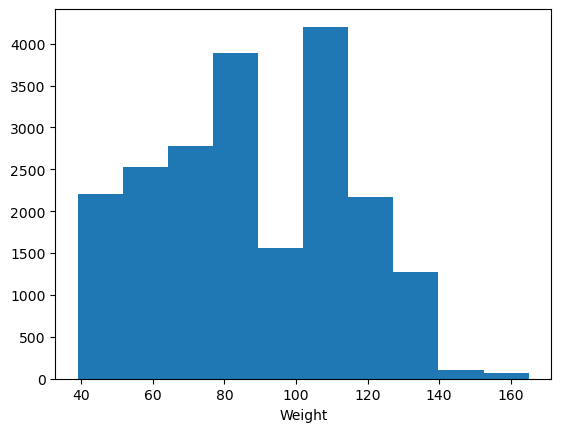

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=39.0, statistic_sign=-1)


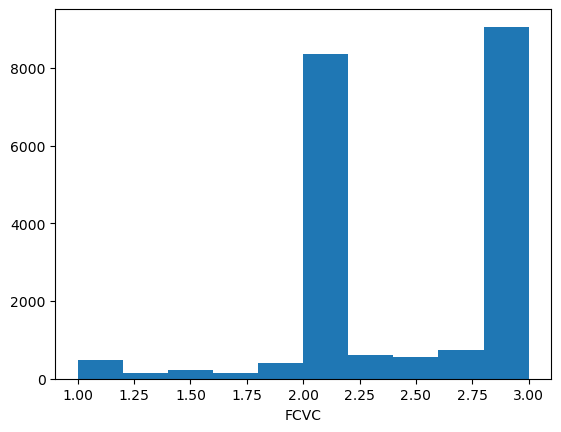

KstestResult(statistic=0.9169079127459642, pvalue=0.0, statistic_location=1.826251, statistic_sign=-1)


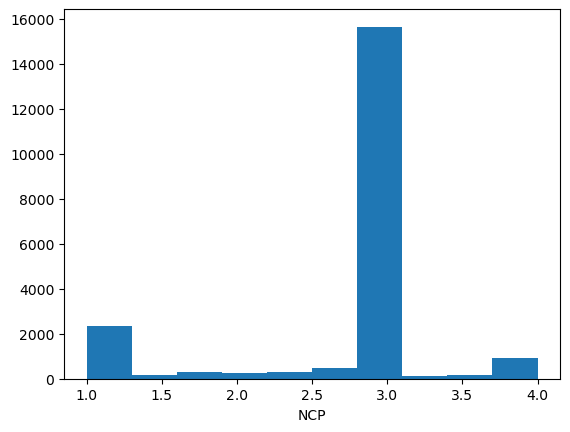

KstestResult(statistic=0.8413447460685429, pvalue=0.0, statistic_location=1.0, statistic_sign=-1)


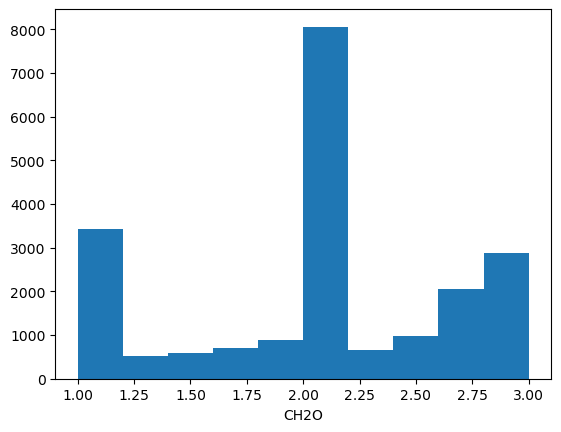

KstestResult(statistic=0.8413447460685429, pvalue=0.0, statistic_location=1.0, statistic_sign=-1)


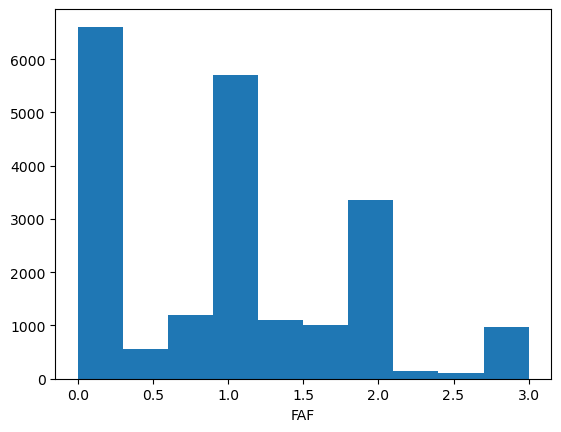

KstestResult(statistic=0.5, pvalue=0.0, statistic_location=0.0, statistic_sign=-1)


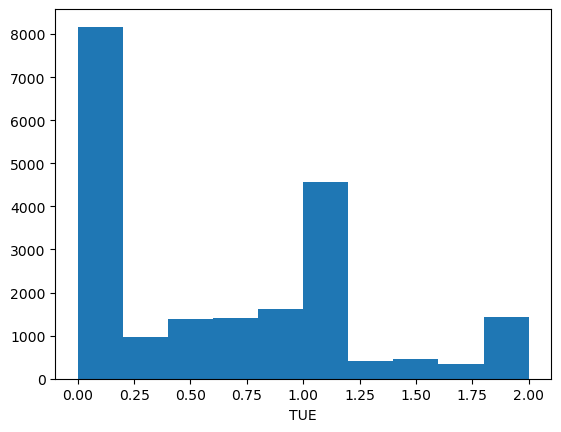

KstestResult(statistic=0.5, pvalue=0.0, statistic_location=0.0, statistic_sign=-1)


In [10]:
from scipy.stats import kstest

for X in Quants:
        plt.hist(obese[X])
        plt.xlabel(X)
        plt.show()
        print(kstest(obese[X], 'norm'))

# Models w/ Age & Weight

## Decision Tree

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(obese[['Weight', 'Age']], obese['NObeyesdad'], random_state=0, test_size=0.2)
X_train.shape

(16606, 2)

In [39]:
feature_names = list(X_train.columns)
X_train

,Weight,Age
7320,132.940660,21.037514
11946,63.000000,26.000000
5370,98.790167,22.720449
1179,133.365094,21.412434
10598,108.000000,18.000000
...,...,...
13123,50.000000,17.000000
19648,110.804337,26.000000
9845,49.676046,17.203917
10799,111.818345,26.000000


## Tree with depth 3

In [40]:
clf = DTC(criterion='entropy',
          max_depth=3,
          random_state=0)        
clf.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [41]:
print(accuracy_score(Y_train, clf.predict(X_train)))
print(f1(Y_train, clf.predict(X_train), average = 'macro'))

0.6038178971456101
0.5315010165711535


In [42]:
resid_dev = np.sum(log_loss(Y_train, clf.predict_proba(X_train)))
resid_dev

0.8261573586340328

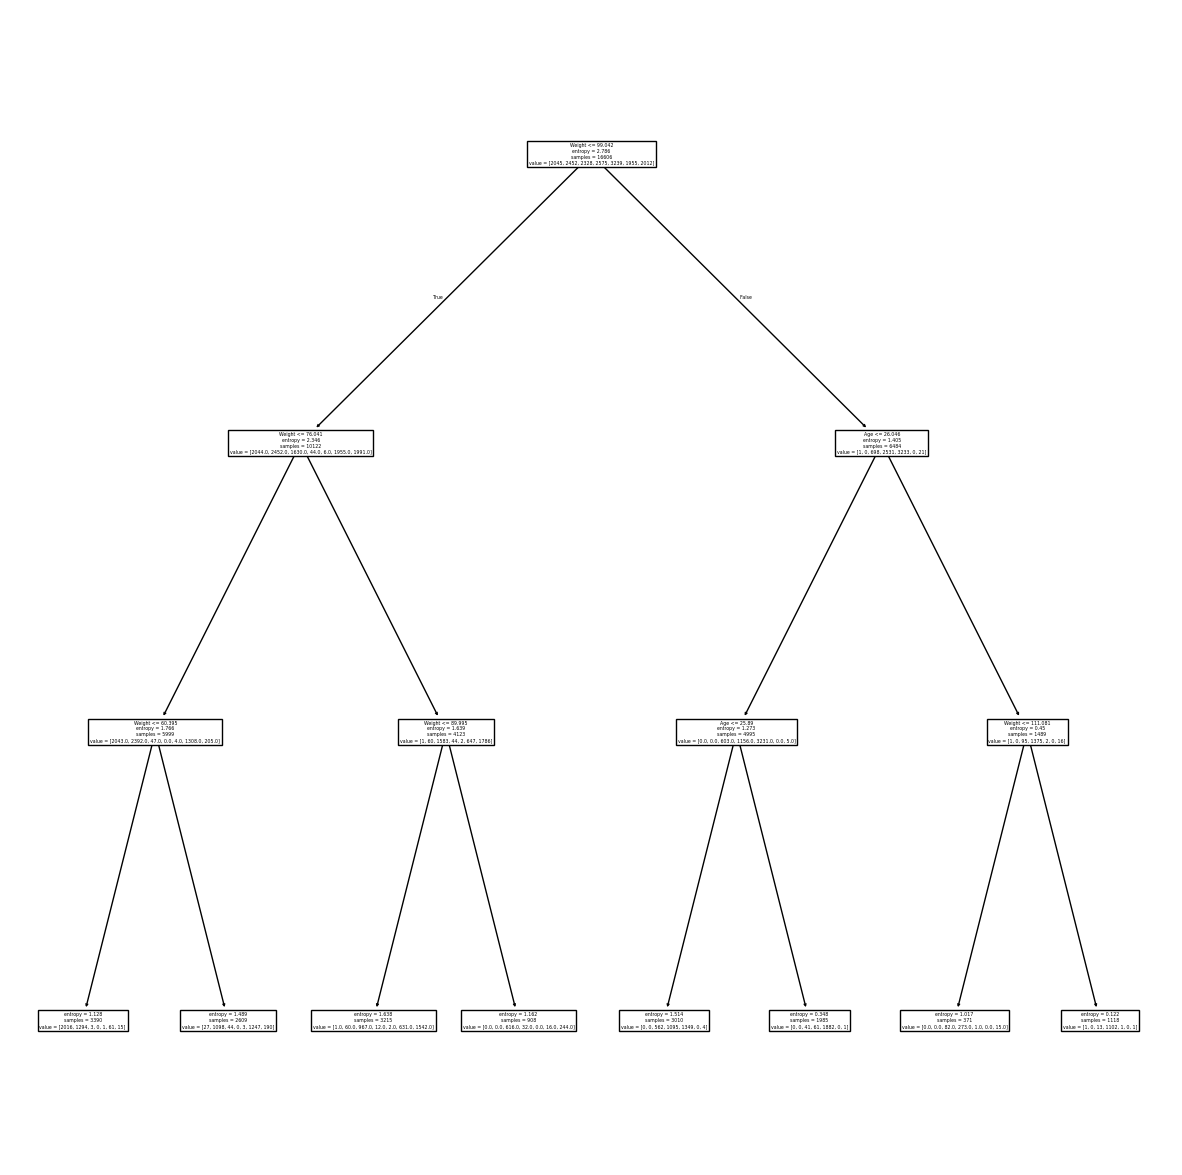

In [43]:
ax = subplots(figsize=(15,15))[1]
plot_tree(clf,
          feature_names=feature_names,
          ax=ax);

In [44]:
print(export_text(clf,
                  feature_names=feature_names,
                  show_weights=True))


|--- Weight <= 99.04
|   |--- Weight <= 76.04
|   |   |--- Weight <= 60.40
|   |   |   |--- weights: [2016.00, 1294.00, 3.00, 0.00, 1.00, 61.00, 15.00] class: Insufficient_Weight
|   |   |--- Weight >  60.40
|   |   |   |--- weights: [27.00, 1098.00, 44.00, 0.00, 3.00, 1247.00, 190.00] class: Overweight_Level_I
|   |--- Weight >  76.04
|   |   |--- Weight <= 89.99
|   |   |   |--- weights: [1.00, 60.00, 967.00, 12.00, 2.00, 631.00, 1542.00] class: Overweight_Level_II
|   |   |--- Weight >  89.99
|   |   |   |--- weights: [0.00, 0.00, 616.00, 32.00, 0.00, 16.00, 244.00] class: Obesity_Type_I
|--- Weight >  99.04
|   |--- Age <= 26.05
|   |   |--- Age <= 25.89
|   |   |   |--- weights: [0.00, 0.00, 562.00, 1095.00, 1349.00, 0.00, 4.00] class: Obesity_Type_III
|   |   |--- Age >  25.89
|   |   |   |--- weights: [0.00, 0.00, 41.00, 61.00, 1882.00, 0.00, 1.00] class: Obesity_Type_III
|   |--- Age >  26.05
|   |   |--- Weight <= 111.08
|   |   |   |--- weights: [0.00, 0.00, 82.00, 273.00, 1.

In [45]:
validation = skm.ShuffleSplit(n_splits=1,
                              test_size=200,
                              random_state=0)
results = skm.cross_validate(clf,
                             X_train,
                             Y_train,
                             cv=validation)
results['test_score']

array([0.65])

## Tree with no depth limit

In [46]:
clf = DTC(criterion='entropy', random_state=0)
clf.fit(X_train, Y_train)
accuracy_score(Y_test, clf.predict(X_test))

0.8015414258188824

In [47]:
ccp_path = clf.cost_complexity_pruning_path(X_train, Y_train)

In [48]:
kfold = skm.KFold(5,
                  random_state=1,
                  shuffle=True)
grid = skm.GridSearchCV(clf,
                        {'ccp_alpha': ccp_path.ccp_alphas},
                        refit=True,
                        cv=kfold,
                        scoring='accuracy')
grid.fit(X_train, Y_train)
grid.best_score_

0.807660372275674

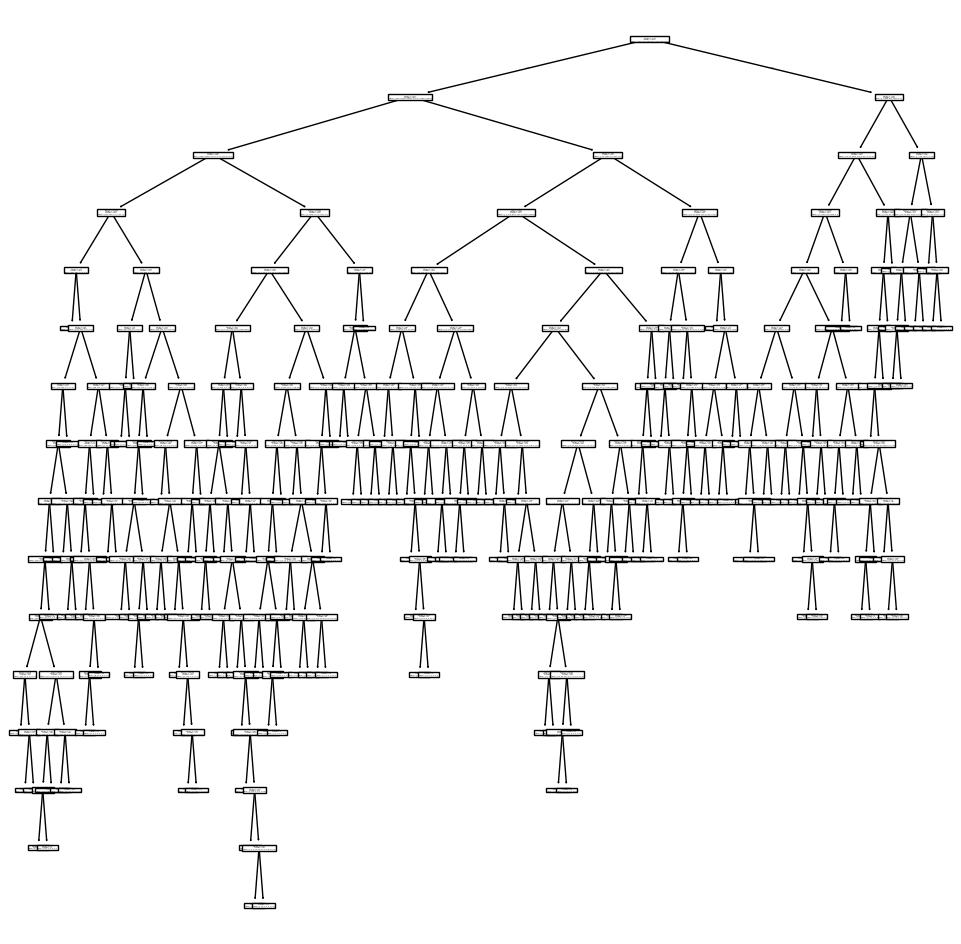

In [49]:
ax = subplots(figsize=(12, 12))[1]
best_ = grid.best_estimator_
plot_tree(best_,
          feature_names=feature_names,
          ax=ax);

In [50]:
print(export_text(best_,
                  feature_names=feature_names,
                  show_weights=True))

|--- Weight <= 99.04
|   |--- Weight <= 76.04
|   |   |--- Weight <= 60.40
|   |   |   |--- Weight <= 52.81
|   |   |   |   |--- Weight <= 44.97
|   |   |   |   |   |--- weights: [436.00, 10.00, 0.00, 0.00, 1.00, 4.00, 0.00] class: Insufficient_Weight
|   |   |   |   |--- Weight >  44.97
|   |   |   |   |   |--- Age <= 19.99
|   |   |   |   |   |   |--- Age <= 19.01
|   |   |   |   |   |   |   |--- Weight <= 51.08
|   |   |   |   |   |   |   |   |--- Weight <= 50.98
|   |   |   |   |   |   |   |   |   |--- Weight <= 50.04
|   |   |   |   |   |   |   |   |   |   |--- Age <= 17.99
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- Age >  17.99
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |--- Weight >  50.04
|   |   |   |   |   |   |   |   |   |   |--- weights: [49.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00] class: Insufficient_Weight
|   |   |   |   |   

In [51]:
best_.tree_.n_leaves

190

In [52]:
print(accuracy_score(Y_test,
                     best_.predict(X_test)))
print(f1(Y_test, best_.predict(X_test), average = 'macro'))
confusion = confusion_table(best_.predict(X_test),
                            Y_test)
confusion

0.8147880539499036
0.7988929316465515


Truth,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
Predicted,,,,,,,
Insufficient_Weight,374,54,1,0,0,4,0
Normal_Weight,97,490,3,0,0,86,26
Obesity_Type_I,0,1,456,33,6,18,62
Obesity_Type_II,0,0,13,620,19,0,5
Obesity_Type_III,0,0,7,16,782,0,0
Overweight_Level_I,4,64,16,0,0,295,51
Overweight_Level_II,3,21,86,4,0,69,366


In [53]:
y_hat_dt = best_.predict(X_train)
print(np.mean((Y_train == y_hat_dt)))
print(f1(Y_train, y_hat_dt, average = 'macro'))

0.8256654221365771
0.8113740183640854


## Bagging

https://www.datacamp.com/tutorial/random-forests-classifier-python

In [18]:
bag_obese = RandomForestClassifier(max_features=X_train.shape[1], random_state=0)
bag_obese.fit(X_train, Y_train)

RandomForestClassifier(max_features=2, random_state=0)

In [19]:
y_hat_bag = bag_obese.predict(X_test)
print(np.mean((Y_test == y_hat_bag)))
print(f1(Y_test, y_hat_bag, average = 'macro'))

confusion = confusion_table(y_hat_bag,
                            Y_test)
confusion

0.8147880539499036
0.7976719530437705


Truth,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
Predicted,,,,,,,
Insufficient_Weight,397,50,1,0,0,3,0
Normal_Weight,74,492,1,0,0,95,28
Obesity_Type_I,1,4,453,31,5,23,69
Obesity_Type_II,0,0,18,624,16,0,6
Obesity_Type_III,0,0,8,13,786,0,0
Overweight_Level_I,6,72,23,0,0,284,60
Overweight_Level_II,0,12,78,5,0,67,347


https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [20]:
bag_obese = RandomForestClassifier(max_features=X_train.shape[1],
                n_estimators=500,
                random_state=0).fit(X_train, Y_train)
y_hat_bag = bag_obese.predict(X_test)
print(np.mean((Y_test == y_hat_bag)))
confusion = confusion_table(y_hat_bag,
                            Y_test)
confusion

0.8147880539499036


Truth,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
Predicted,,,,,,,
Insufficient_Weight,393,49,1,0,0,3,0
Normal_Weight,78,490,1,0,0,91,26
Obesity_Type_I,1,4,450,27,5,23,70
Obesity_Type_II,0,0,20,628,16,0,7
Obesity_Type_III,0,0,8,14,786,0,0
Overweight_Level_I,6,74,21,0,0,291,62
Overweight_Level_II,0,13,81,4,0,64,345


In [21]:
y_hat_bag = bag_obese.predict(X_train)
print(np.mean((Y_train == y_hat_bag)))
print(f1(Y_train, y_hat_bag, average = 'macro'))


0.9044923521618692
0.8957672997195852


## Random Forest

In [28]:
RF_obese = RandomForestClassifier(max_features=6,
               random_state=0).fit(X_train, Y_train)
y_hat_RF = RF_obese.predict(X_test)
print(np.mean((Y_test == y_hat_RF)))
print(f1(Y_test, y_hat_RF, average = 'macro'))

confusion = confusion_table(y_hat_RF,
                            Y_test)
confusion

0.8147880539499036
0.7976719530437705


Truth,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
Predicted,,,,,,,
Insufficient_Weight,397,50,1,0,0,3,0
Normal_Weight,74,492,1,0,0,95,28
Obesity_Type_I,1,4,453,31,5,23,69
Obesity_Type_II,0,0,18,624,16,0,6
Obesity_Type_III,0,0,8,13,786,0,0
Overweight_Level_I,6,72,23,0,0,284,60
Overweight_Level_II,0,12,78,5,0,67,347


In [26]:
feature_imp = pd.DataFrame(
    {'importance':RF_obese.feature_importances_},
    index=feature_names)
feature_imp.sort_values(by='importance', ascending=False)

,importance
Weight,0.6774
Age,0.3226


In [27]:
y_hat_bag = RF_obese.predict(X_train)
print(np.mean((Y_train == y_hat_bag)))
print(f1(Y_train, y_hat_bag, average = 'macro'))

0.9044321329639889
0.8957237732814475


## Boosting

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

In [31]:
boost_obese = GradientBoostingClassifier(n_estimators=500,
                   learning_rate=0.01,
                   max_depth=3,
                   random_state=0)
boost_obese.fit(X_train, Y_train)

GradientBoostingClassifier(learning_rate=0.01, n_estimators=500, random_state=0)

In [32]:
y_hat_bst = boost_obese.predict(X_train)
print(np.mean((Y_train == y_hat_bst)))
print(f1(Y_train, y_hat_bst, average = 'macro'))

0.814404432132964
0.7969950628699561


In [33]:
y_hat_bst = boost_obese.predict(X_test)
print(np.mean((Y_test == y_hat_bst)))
print(f1(Y_test, y_hat_bst, average = 'macro'))

0.8171965317919075
0.7993900884018454


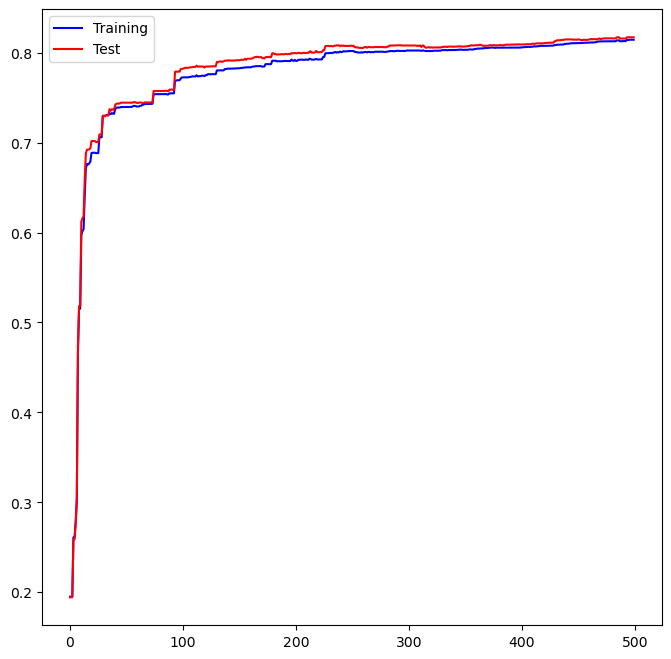

In [36]:
test_error = np.zeros_like(boost_obese.train_score_)
train_error = np.zeros_like(boost_obese.train_score_)
for idx, y_ in enumerate(boost_obese.staged_predict(X_train)):
   train_error[idx] = np.mean((Y_train == y_))

for idx, y_ in enumerate(boost_obese.staged_predict(X_test)):
   test_error[idx] = np.mean((Y_test == y_))
    
plot_idx = np.arange(boost_obese.train_score_.shape[0])
ax = subplots(figsize=(8,8))[1]
ax.plot(plot_idx,
        train_error,
        'b',
        label='Training')
ax.plot(plot_idx,
        test_error,
        'r',
        label='Test')
ax.legend();

# Models w/ all Predictors

## Decision Trees

In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(obese[Predictors], obese['NObeyesdad'], random_state=0, test_size=0.2)
X_train.shape
feature_names = list(X_train.columns)


0.9200289052149825
0.910748829136417
|--- Weight <= 99.04
|   |--- Weight <= 76.04
|   |   |--- Weight <= 60.40
|   |   |   |--- Weight <= 52.81
|   |   |   |   |--- Height <= 1.63
|   |   |   |   |   |--- Weight <= 46.83
|   |   |   |   |   |   |--- Weight <= 44.97
|   |   |   |   |   |   |   |--- FCVC <= 2.58
|   |   |   |   |   |   |   |   |--- Weight <= 41.98
|   |   |   |   |   |   |   |   |   |--- weights: [35.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00] class: Insufficient_Weight
|   |   |   |   |   |   |   |   |--- Weight >  41.98
|   |   |   |   |   |   |   |   |   |--- CAEC_Frequently <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [5.00, 5.00, 0.00, 0.00, 0.00, 1.00, 0.00] class: Insufficient_Weight
|   |   |   |   |   |   |   |   |   |--- CAEC_Frequently >  0.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [34.00, 2.00, 0.00, 0.00, 0.00, 1.00, 0.00] class: Insufficient_Weight
|   |   |   |   |   |   |   |--- FCVC >  2.58
|   |   |   |   |   |   |   |   |--

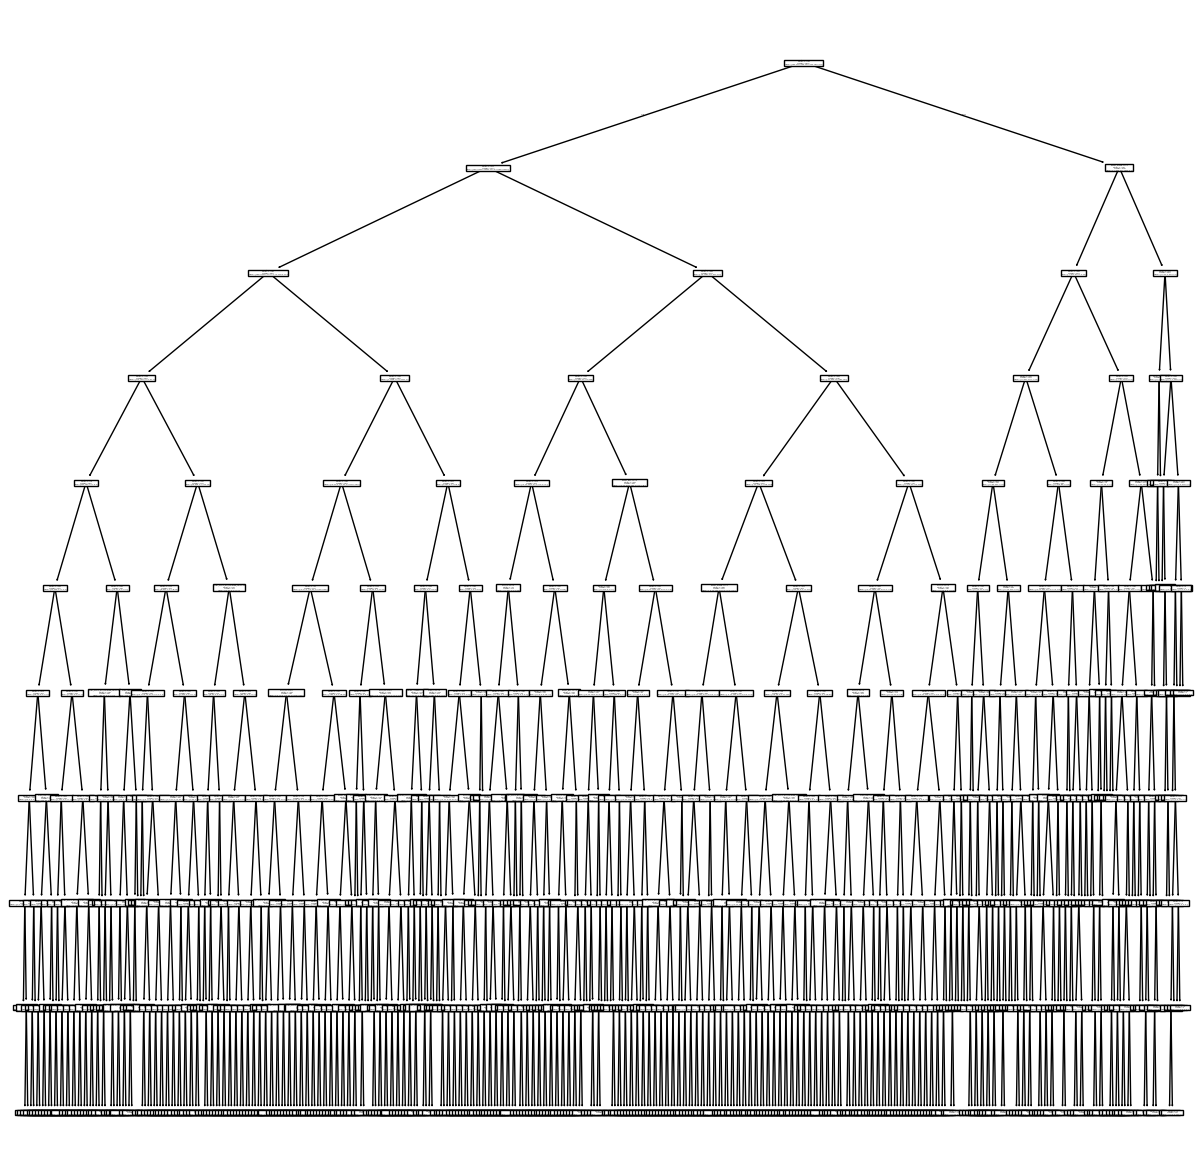

In [58]:
clf = DTC(criterion='entropy',
          max_depth=10,
          random_state=0)        
clf.fit(X_train, Y_train)

print(accuracy_score(Y_train, clf.predict(X_train)))
print(f1(Y_train, clf.predict(X_train), average = 'macro'))


ax = subplots(figsize=(15,15))[1]
plot_tree(clf,
          feature_names=feature_names,
          ax=ax);

print(export_text(clf,
                  feature_names=feature_names,
                  show_weights=True))

In [60]:
print("test: ", accuracy_score(Y_test,
                     clf.predict(X_test)))
print(f1(Y_test, clf.predict(X_test), average = 'macro'))

y_hat_dt = clf.predict(X_train)
print("train: ", np.mean((Y_train == y_hat_dt)))
print(f1(Y_train, y_hat_dt, average = 'macro'))

confusion = confusion_table(clf.predict(X_test),
                            Y_test)
confusion

test:  0.8701830443159922
0.8565441177907163
train:  0.9200289052149825
0.910748829136417


Truth,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
Predicted,,,,,,,
Insufficient_Weight,441,48,1,0,0,2,0
Normal_Weight,33,528,0,0,0,62,10
Obesity_Type_I,0,0,481,25,0,9,45
Obesity_Type_II,0,0,26,633,0,0,3
Obesity_Type_III,0,0,4,2,807,0,0
Overweight_Level_I,3,46,13,0,0,334,63
Overweight_Level_II,1,8,57,13,0,65,389


Pruning was skipped due to computation time.

### Export Predictions for Kaggle

In [73]:
obese_level = clf.predict(test[Predictors])
print(obese_level)

output = pd.DataFrame(test[['id']])
output['NObeyesdad'] = obese_level
print(output)
output.to_csv('model_DT_AllPredictors.csv', index = False)

['Obesity_Type_II' 'Overweight_Level_I' 'Obesity_Type_III' ...
 'Insufficient_Weight' 'Normal_Weight' 'Obesity_Type_II']
          id           NObeyesdad
0      20758      Obesity_Type_II
1      20759   Overweight_Level_I
2      20760     Obesity_Type_III
3      20761       Obesity_Type_I
4      20762     Obesity_Type_III
...      ...                  ...
13835  34593  Overweight_Level_II
13836  34594        Normal_Weight
13837  34595  Insufficient_Weight
13838  34596        Normal_Weight
13839  34597      Obesity_Type_II

[13840 rows x 2 columns]


## Bagging

In [61]:
bag_obese = RandomForestClassifier(max_features=X_train.shape[1],
                n_estimators=500,
                random_state=0).fit(X_train, Y_train)
y_hat_bag = bag_obese.predict(X_test)
print(np.mean((Y_test == y_hat_bag)))
confusion = confusion_table(y_hat_bag,
                            Y_test)




0.8976396917148363
1.0
1.0


In [63]:
y_hat_bag = bag_obese.predict(X_train)
print(np.mean((Y_train == y_hat_bag)))
print(f1(Y_train, y_hat_bag, average = 'macro'))

y_hat_bag = bag_obese.predict(X_test)
print(np.mean((Y_test == y_hat_bag)))
print(f1(Y_test, y_hat_bag, average = 'macro'))

1.0
1.0
0.8976396917148363
0.8868046253672165


In [62]:
confusion

Truth,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
Predicted,,,,,,,
Insufficient_Weight,440,31,1,0,0,2,0
Normal_Weight,34,550,0,0,0,44,7
Obesity_Type_I,0,2,503,19,1,4,30
Obesity_Type_II,0,0,17,646,0,0,6
Obesity_Type_III,0,0,2,1,806,0,0
Overweight_Level_I,3,41,13,0,0,361,46
Overweight_Level_II,1,6,46,7,0,61,421


### Export Predictions for Kaggle

In [72]:
obese_level = bag_obese.predict(test[Predictors])
print(obese_level)

output = pd.DataFrame(test[['id']])
output['NObeyesdad'] = obese_level
print(output)
output.to_csv('model_bag_AllPredictors.csv', index = False)

['Obesity_Type_II' 'Overweight_Level_I' 'Obesity_Type_III' ...
 'Insufficient_Weight' 'Normal_Weight' 'Obesity_Type_II']
          id           NObeyesdad
0      20758      Obesity_Type_II
1      20759   Overweight_Level_I
2      20760     Obesity_Type_III
3      20761       Obesity_Type_I
4      20762     Obesity_Type_III
...      ...                  ...
13835  34593  Overweight_Level_II
13836  34594   Overweight_Level_I
13837  34595  Insufficient_Weight
13838  34596        Normal_Weight
13839  34597      Obesity_Type_II

[13840 rows x 2 columns]


## Random Forest

In [64]:
RF_obese = RandomForestClassifier(max_features=6,
               random_state=0).fit(X_train, Y_train)

confusion = confusion_table(y_hat_RF,
                            Y_test)
confusion

Truth,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
Predicted,,,,,,,
Insufficient_Weight,397,50,1,0,0,3,0
Normal_Weight,74,492,1,0,0,95,28
Obesity_Type_I,1,4,453,31,5,23,69
Obesity_Type_II,0,0,18,624,16,0,6
Obesity_Type_III,0,0,8,13,786,0,0
Overweight_Level_I,6,72,23,0,0,284,60
Overweight_Level_II,0,12,78,5,0,67,347


In [65]:
y_hat_bag = RF_obese.predict(X_train)
print(np.mean((Y_train == y_hat_bag)))
print(f1(Y_train, y_hat_bag, average = 'macro'))

y_hat_bag = RF_obese.predict(X_test)
print(np.mean((Y_test == y_hat_bag)))
print(f1(Y_test, y_hat_bag, average = 'macro'))

1.0
1.0
0.890655105973025
0.8782121421959904


### Export Predictions for Kaggle

In [71]:
obese_level = RF_obese.predict(test[Predictors])
print(obese_level)

output = pd.DataFrame(test[['id']])
output['NObeyesdad'] = obese_level
print(output)
output.to_csv('model_RF_AllPredictors.csv', index = False)

['Obesity_Type_II' 'Overweight_Level_I' 'Obesity_Type_III' ...
 'Insufficient_Weight' 'Normal_Weight' 'Obesity_Type_II']
          id           NObeyesdad
0      20758      Obesity_Type_II
1      20759   Overweight_Level_I
2      20760     Obesity_Type_III
3      20761       Obesity_Type_I
4      20762     Obesity_Type_III
...      ...                  ...
13835  34593  Overweight_Level_II
13836  34594        Normal_Weight
13837  34595  Insufficient_Weight
13838  34596        Normal_Weight
13839  34597      Obesity_Type_II

[13840 rows x 2 columns]


## Boosting

In [68]:
boost_obese = GradientBoostingClassifier(n_estimators=500,
                   learning_rate=0.01,
                   max_depth=10,
                   random_state=0)
boost_obese.fit(X_train, Y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=10, n_estimators=500,
                           random_state=0)

In [69]:
y_hat_bag = boost_obese.predict(X_train)
print(np.mean((Y_train == y_hat_bag)))
print(f1(Y_train, y_hat_bag, average = 'macro'))

y_hat_bag = boost_obese.predict(X_test)
print(np.mean((Y_test == y_hat_bag)))
print(f1(Y_test, y_hat_bag, average = 'macro'))

0.9996386848127183
0.9995736928503618
0.8976396917148363
0.8866946800225346


### Export Predictions for Kaggle

In [70]:
obese_level = boost_obese.predict(test[Predictors])
print(obese_level)

output = pd.DataFrame(test[['id']])
output['NObeyesdad'] = obese_level
print(output)
output.to_csv('model_boost_AllPredictors.csv', index = False)

['Obesity_Type_II' 'Overweight_Level_I' 'Obesity_Type_III' ...
 'Insufficient_Weight' 'Normal_Weight' 'Obesity_Type_II']
          id           NObeyesdad
0      20758      Obesity_Type_II
1      20759   Overweight_Level_I
2      20760     Obesity_Type_III
3      20761       Obesity_Type_I
4      20762     Obesity_Type_III
...      ...                  ...
13835  34593  Overweight_Level_II
13836  34594   Overweight_Level_I
13837  34595  Insufficient_Weight
13838  34596        Normal_Weight
13839  34597      Obesity_Type_II

[13840 rows x 2 columns]
